In [1]:
# To run this in Google Colab, uncomment the following line
# !pip install "git+https://github.com/GPflow/GeometricKernels.git"

# If you want to use a version of the library from a different git branch,
# say, from the "devel" branch, uncomment the line below instead
# !pip install "git+https://github.com/GPflow/GeometricKernels@devel#egg=GeometricKernels"

# Matérn and Heat Kernels on the Special Orthogonal Group $\mathrm{SO}(n)$

This notebook shows how define and evaluate kernels on the special orthogonal group $\mathrm{SO}(3)$ that consists of $3 \times 3$ orhogonal matrices with unit determinant.

Handling the special orthogonal group $\mathrm{SO}(n)$ for $n \geq 4$ is the same.
We work with $\mathrm{SO}(3)$ here because (1) it is the most well known case (2) it is easier (although still non-trivial) to visualize.

**Note:** the "points" in the special orthogonal group $\mathrm{SO}(3)$ are represented by matrices (`array`s of the suitable backend) in $\mathbb{R}^{n \times n}$ whose determinant is equal to $1$.

We use the **numpy** backend here.

In [2]:
# Import a backend, we use numpy in this example.
import numpy as np

# Import the geometric_kernels backend.
import geometric_kernels

# Note: if you are using a backend other than numpy,
# you _must_ uncomment one of the following lines
# import geometric_kernels.tensorflow
# import geometric_kernels.torch
# import geometric_kernels.jax

# Import a space and an appropriate kernel.
from geometric_kernels.spaces import SOGroup
from geometric_kernels.kernels import MaternGeometricKernel

import matplotlib as mpl
import matplotlib.pyplot as plt

INFO: Using numpy backend


## Defining a Space

First we create a GeometricKernels `space` that corresponds to the special orthogonal group $\mathrm{SO}(3)$, a subset of the set of all $3 \times 3$ matrices $\mathbb{R}^{3 \times 3}$.

In [3]:
so = SOGroup(n=3)

## Defining a Kernel

First, we create a generic Matérn kernel.

To initialize `MaternGeometricKernel` you just need to provide a `Space` object, in our case this is the `so` we have just created above.

There is also an optional second parameter `num` which determines the order of approximation of the kernel.
There is a sensible default value for each of the spaces in the library, so change it only if you know what you are doing.

A brief account on theory behind the kernels on compact manifold like (which $\mathrm{SO}(n)$ are examples of) can be found on these documentation pages: [one](https://gpflow.github.io/GeometricKernels/theory/compact.html), [two](https://gpflow.github.io/GeometricKernels/theory/addition_theorem.html).

In [4]:
kernel = MaternGeometricKernel(so)

To support JAX, our classes do not keep variables you might want to differentiate over in their state.
Instead, some methods take a `params` dictionary as input, returning its modified version.

The next line initializes the dictionary of kernel parameters `params` with some default values.

**Note:** our kernels do not contain the outputscale/variance parameter frequently used in Gaussian processes.
However, it is usually trivial to add it by multiplying the kernel by an (optimizable) constant.

In [5]:
params = kernel.init_params()
print('params:', params)

params: {'lengthscale': array(1.), 'nu': array(inf)}


To define two different kernels, Matern-3/2 and Matern-∞ (aka heat, RBF, squared exponential, diffusion), we need two different versions of `params`:

In [6]:
params["lengthscale"] = np.array([0.5])
params_32  = params.copy()
params_inf = params.copy()
del params
params_32["nu"]  = np.array([3/2])
params_inf["nu"] = np.array([np.inf])

Now two kernels are *defined* and we proceed to evaluating both on a set of random inputs.

## Evaluating Kernels on Random Inputs

We start by sampling `10` (uniformly) random points on the sphere $\mathbb{S}_2$.
An explicit `key` parameter is needed to support JAX as one of the backends.

In [7]:
key = np.random.RandomState(1234)

key, xs = so.random(key, 10)

print(xs)

[[[-0.83118121 -0.53251727  0.15988481]
  [-0.05989292 -0.20013482 -0.97793604]
  [ 0.55276635 -0.82241803  0.13445429]]

 [[-0.24549041 -0.96836999 -0.04465438]
  [-0.07519823 -0.02690221  0.99680565]
  [-0.96647798  0.24806416 -0.06621548]]

 [[-0.7316939   0.30139255  0.61138087]
  [-0.32058557  0.63938043 -0.69886877]
  [-0.6015388  -0.7073579  -0.37120866]]

 [[-0.64400808 -0.75505391 -0.12307395]
  [-0.75449949  0.60029278  0.2652906 ]
  [-0.1264283   0.26370852 -0.95628118]]

 [[ 0.16603267 -0.8784055   0.44814834]
  [ 0.98529484  0.12918269 -0.11182982]
  [ 0.04033892  0.46012565  0.88693695]]

 [[-0.1476533   0.58885089  0.79464025]
  [ 0.06351094  0.80743353 -0.58653001]
  [-0.9869979  -0.03613474 -0.1566187 ]]

 [[ 0.76324266 -0.64597696  0.01320642]
  [ 0.2130557   0.23233043 -0.94901519]
  [ 0.60997369  0.72714259  0.31495357]]

 [[-0.79343507 -0.45989196 -0.3986981 ]
  [-0.08361101  0.73119258 -0.67702778]
  [ 0.60288472 -0.50384203 -0.61860587]]

 [[-0.24647287  0.670827

In [8]:
# import warnings
# warnings.filterwarnings(action="error", category=np.ComplexWarning)

Now we evaluate the two kernel matrices.

In [9]:
kernel_mat_32  = kernel.K(params_32,  xs, xs)
kernel_mat_inf = kernel.K(params_inf, xs, xs)

/Users/vabor112/Workspace/GeometricKernels/venv/lib/python3.9/site-packages/beartype/_util/hint/pep/utilpeptest.py:347: BeartypeDecorHintPep585DeprecationWarning: PEP 484 type hint typing.List deprecated by PEP 585. This hint is scheduled for removal in the first Python version released after October 5th, 2025. To resolve this, import this hint from "beartype.typing" rather than "typing". For further commentary and alternatives, see also:
    https://beartype.readthedocs.io/en/latest/api_roar/#pep-585-deprecations
  warn(


Finally, we visualize these matrices using `imshow`.

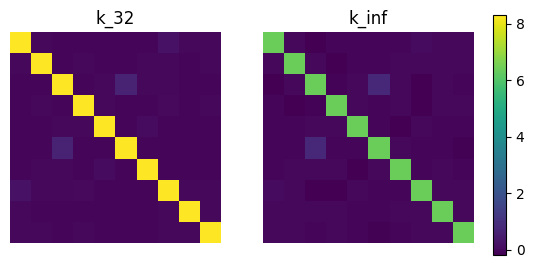

In [11]:
# find common range of values
minmin = np.min([np.min(kernel_mat_32), np.min(kernel_mat_inf)])
maxmax = np.max([np.max(kernel_mat_32), np.max(kernel_mat_inf)])

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
cmap = plt.get_cmap('viridis')

ax1.imshow(kernel_mat_32, vmin=minmin, vmax=maxmax, cmap=cmap)
ax1.set_title('k_32')
ax1.set_axis_off()

ax2.imshow(kernel_mat_inf, vmin=minmin, vmax=maxmax, cmap=cmap)
ax2.set_title('k_inf')
ax2.set_axis_off()

# add space for color bar
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.88, 0.25, 0.02, 0.5])

# add colorbar
sm = plt.cm.ScalarMappable(cmap=cmap,
                           norm=plt.Normalize(vmin=minmin, vmax=maxmax))
fig.colorbar(sm, cax=cbar_ax)

plt.show()

In [12]:
# kernel.normalize

In [13]:
# stop

## Visualize Kernels

It is hard to visualize functions on $\mathrm{SO}(n)$.
Why so?
Well, we have $\dim \left(\mathrm{SO}(n)\right) = n(n-1)/2$, thus even $\dim \left(\mathrm{SO}(2)\right) = 3$ is greater than $2$.
Functions are only easy to visualize on domains with dimension not higher than $2$.

To get some understanding of how kernels and samples of Gaussian processes on $\mathrm{SO}(n)$ look like, we will do something like visualizing $f: \mathbb{R}^n \to \mathbb{R}$ by examining the plots of $\alpha \to f(\alpha \mathbf{v})$ for random vectors $\mathbf{v}$. In our case, we will take a random matrix $\mathbf{U} \in \mathrm{SO}(n)$ and visualize functions $\alpha \to f(\mathbf{U}^{\top} \mathbf{E}(\alpha) \mathbf{U})$ where $\alpha \in [0, 2 \pi)$ and
$$
\mathbf{E}(\alpha)
=
\begin{bmatrix} 
    \cos(\alpha) & -\sin(\alpha) & 0 & \dots  & 0     \\
    \sin(\alpha) & \cos(\alpha)  & 0 & \dots  & 0     \\
    0            & 0             & 1 & \dots  & 0     \\
    \vdots       & \vdots        & 0 & \ddots & \vdots\\
    0            & 0             & 0 & \dots  & 1     \\
\end{bmatrix}
$$
is the standard embedding of the one-dimensional rotation group $\mathrm{SO}(2)$ (which can be regarded as the circle $\mathbb{T}$) into $\mathrm{SO}(n)$.
Intuitively, this corresponds to rotating by angle $\alpha$ around a random axis in $\mathbb{R}^n$.
To better reflect the structure of $\alpha$, we will actually treat it as a point on the circle, rather than an angle.

We will plot the functions $k_{\nu, \kappa}(\mathbf{I}, \mathbf{U}^{\top} \mathbf{E}(\alpha) \mathbf{U})$.

In practice, we visualize $k_{\nu, \kappa}($ `base_point` $, x)$ for $x \in $ `other_points1` or $x \in $ `other_points2`.
The `base_point` is simply the identity matrix $\mathbf{I}$.
The `other_points1` and `other_points2` are defined by the `_NUM_ANGLES` uniform discretization of the unit circle.

We define `base_point`, `other_points`, and `other_points2` in the next cell.

In [14]:
# define discretization
_NUM_ANGLES = 128

key, U = so.random(key, 2)
U1 = U[0, :]
U2 = U[1, :]

# generate a grid on [0, 2 \pi)
angles = np.linspace(0, 2*np.pi, num=_NUM_ANGLES)
embedding = np.broadcast_to(np.eye(3), (_NUM_ANGLES, 3, 3)).copy()
embedding[:, 0, 0] = np.cos(angles)
embedding[:, 0, 1] = -np.sin(angles)
embedding[:, 1, 0] = np.sin(angles)
embedding[:, 1, 1] = np.cos(angles)

base_point = embedding[[0], :, :]

def conj_batch(U, emb):
    """ Compute U^T * emb[i, :] * U for all i.
    :param U:   [3, 3] array
    :param emb: [N, 3, 3] array
    
    :return:    [N, 3, 3] array
    """
    return np.tensordot(np.tensordot(emb, U, axes=([2], [0])),
                        U.T, axes=([1], [1])
                       )

other_points1, other_points2 = conj_batch(U1, embedding), conj_batch(U2, embedding)

The next cell evaluates $k_{\nu, \kappa}($ `base_point` $, x)$ for $x \in $ `other_points1` and $x \in $ `other_points2`, for $\nu$ either $3/2$ or $\infty$.

In [16]:
kernel_vals_32_1  = kernel.K(params_32,  base_point, other_points1)
kernel_vals_32_2  = kernel.K(params_32,  base_point, other_points2)
kernel_vals_inf_1 = kernel.K(params_inf, base_point, other_points1)
kernel_vals_inf_2 = kernel.K(params_inf, base_point, other_points2)

Finally, we are ready to plot the results.

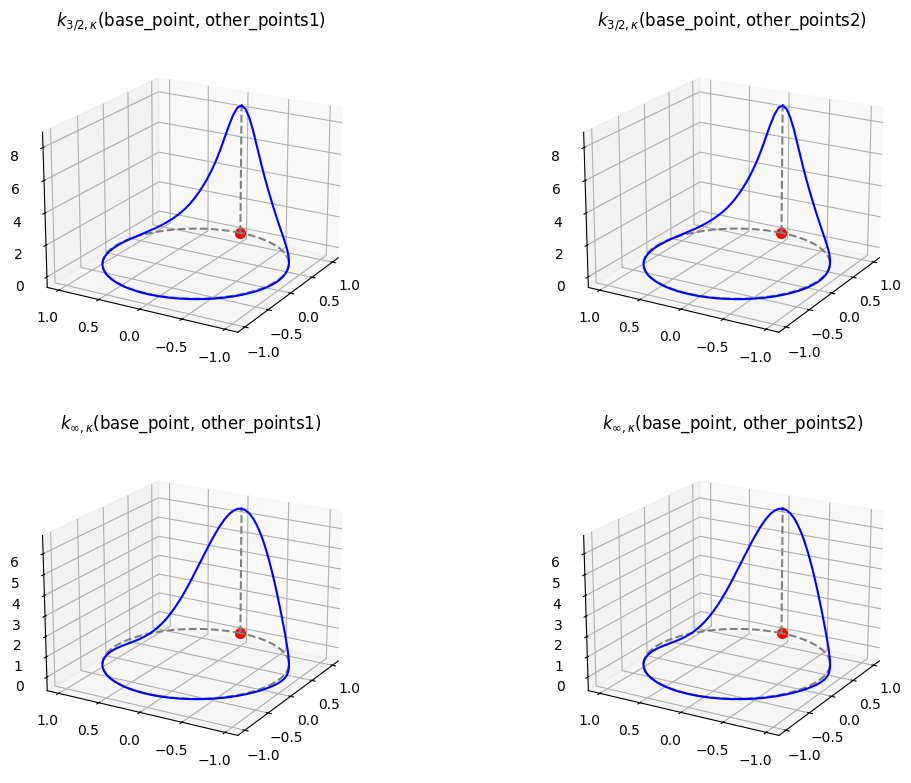

In [18]:
x_circle = np.cos(angles)
y_circle = np.sin(angles)
z_circle = np.zeros_like(angles) # z=0 for the circle

# Red ball position
red_ball_position = (x_circle[0], y_circle[0], z_circle[0])


def plot_kernel(ax, values, title):
    # Draw the unit circle
    ax.plot(x_circle, y_circle, z_circle, linestyle='dashed', color='gray')
    # Draw the red ball
    ax.scatter(*red_ball_position, color="r", s=50)
    # Draw the vertical dashed line
    ax.plot([1, 1], [0, 0], np.linspace(0, values[0, 0], 2), linestyle='dashed', color='gray')
    # Plot the new function evaluated only on the unit circle
    ax.plot(x_circle, y_circle, values[0, :], color='b')
    # Set the viewing angle for better visualization
    ax.view_init(elev=20., azim=180+30)
    ax.set_title(title)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(figsize=(12.8, 9.6), nrows=2, ncols=2,
                               subplot_kw=dict(projection='3d',
                                               computed_zorder=False))

plot_kernel(ax1, kernel_vals_32_1,  r'$k_{3/2, \kappa}($base_point, other_points1$)$')
plot_kernel(ax2, kernel_vals_32_2,  r'$k_{3/2, \kappa}($base_point, other_points2$)$')
plot_kernel(ax3, kernel_vals_inf_1, r'$k_{\infty, \kappa}($base_point, other_points1$)$')
plot_kernel(ax4, kernel_vals_inf_2, r'$k_{\infty, \kappa}($base_point, other_points2$)$')


# Display the plot
plt.show()

# Feature Maps and Sampling

Here we show how to get an approximate finite-dimensional feature map for heat and Matérn kernels on the sphere, i.e. such $\phi$ that
$$
k(x, x') \approx \langle \phi(x), \phi(x') \rangle_{\mathbb{R}^M}.
$$
This might be useful for speeding up computations.
We showcase this below by showing how to efficiently sample the Gaussian process $\mathrm{GP}(0, k)$.

For a brief theoretical introduction into feature maps, see this [documentation page](https://gpflow.github.io/GeometricKernels/theory/feature_maps.html).

The simplest way to get an approximate finite-dimensional feature map is to use the `default_feature_map` function from `geometric_kernels.kernels`.
It has an optional keyword argument `num` which determines the number of features, the $M$ above.
Below we rely on the default value of `num`.

In [19]:
from geometric_kernels.kernels import default_feature_map

feature_map = default_feature_map(kernel=kernel)

The resulting `feature_map` is a function that takes the array of inputs and parameters of the kernel.
There is also an optional parameter `normalize` that determines if $\langle \phi(x), \phi(x) \rangle_{\mathbb{R}^M} \approx 1$ or not.
For the (hyper)sphere, `normalize` follows the standard behavior of `MaternKarhunenLoeveKernel`, being `True` by default.

`feature_map` outputs a tuple.
Its **second** element is $\phi(x)$ evaluated at all inputs $x$.
Its first element is either `None` for determinstic feature maps, or contains the updated `key` for randomized feature maps which take `key` as a keyword argument.
For `default_feature_map` on a `SOGroup` space, the first element is `None` since the feature map is *deterministic*.

In the next cell, we evaluate the feature map at random points, using `params_32` as kernel parameters.
We check the basic property of the feature map: $k(x, x') \approx \langle \phi(x), \phi(x') \rangle_{\mathbb{R}^M}$.

In [20]:
# xs are random points from above
key, embedding = feature_map(xs, params_32, key=key)

print('xs (shape = %s):\n%s' % (xs.shape, xs))
print('')
print('emedding (shape = %s):\n%s' % (embedding.shape, embedding))

kernel_mat_32  = kernel.K(params_32,  xs, xs)
kernel_mat_32_alt = np.matmul(embedding, embedding.T)

print('')
print('||k(xs, xs) - phi(xs) * phi(xs)^T|| =', np.linalg.norm(kernel_mat_32 - kernel_mat_32_alt))

xs (shape = (10, 3, 3)):
[[[-0.83118121 -0.53251727  0.15988481]
  [-0.05989292 -0.20013482 -0.97793604]
  [ 0.55276635 -0.82241803  0.13445429]]

 [[-0.24549041 -0.96836999 -0.04465438]
  [-0.07519823 -0.02690221  0.99680565]
  [-0.96647798  0.24806416 -0.06621548]]

 [[-0.7316939   0.30139255  0.61138087]
  [-0.32058557  0.63938043 -0.69886877]
  [-0.6015388  -0.7073579  -0.37120866]]

 [[-0.64400808 -0.75505391 -0.12307395]
  [-0.75449949  0.60029278  0.2652906 ]
  [-0.1264283   0.26370852 -0.95628118]]

 [[ 0.16603267 -0.8784055   0.44814834]
  [ 0.98529484  0.12918269 -0.11182982]
  [ 0.04033892  0.46012565  0.88693695]]

 [[-0.1476533   0.58885089  0.79464025]
  [ 0.06351094  0.80743353 -0.58653001]
  [-0.9869979  -0.03613474 -0.1566187 ]]

 [[ 0.76324266 -0.64597696  0.01320642]
  [ 0.2130557   0.23233043 -0.94901519]
  [ 0.60997369  0.72714259  0.31495357]]

 [[-0.79343507 -0.45989196 -0.3986981 ]
  [-0.08361101  0.73119258 -0.67702778]
  [ 0.60288472 -0.50384203 -0.61860587]]


## Efficient Sampling using Feature Maps

GeometricKernels provides a simple tool to efficiently sample (without incurring cubic costs) the Gaussian process $f \sim \mathrm{GP}(0, k)$, based on an approximate finite-dimensional feature map $\phi$.
The underlying machinery is briefly discussed in this [documentation page](https://gpflow.github.io/GeometricKernels/theory/feature_maps.html).

The function `sampler` from `geometric_kernels.sampling` takes in a feature map and, optionally, the keyword argument `s` that specifies the number of samples to generate.
It returns a function we name `sample_paths`.
Since we are going to compute each of the two samples at two different sets of inputs, `other_points1` and `other_points2`, we make sure the randomness if fixed by using the `make_deterministic` function.

`sample_paths` operates much like `feature_map` above: it takes in the points where to evaluate the samples and kernel parameters.
Additionally, it takes in the keyword argument `key` that specifies randomness in the JAX style.
**However**, in our specific case, this keyword argument is not needed as it is automatically supplied by the `make_deterministic` wrapper.
`sample_paths` returns a tuple.
Its first element is the updated `key`.
Its second element is an array containing the value of samples evaluated at the input points.

In [21]:
from geometric_kernels.sampling import sampler
from geometric_kernels.utils.utils import make_deterministic

# introduce random state for reproducibility (optional)
# `key` is jax's terminology
key = np.random.RandomState(seed=1234)

sample_paths = make_deterministic(sampler(feature_map, s=2), key)

# new random state is returned along with the samples
key, samples = sample_paths(xs, params_32)

print('Two samples evaluated at the xs are:')
print(samples)

Two samples evaluated at the xs are:
[[-0.29913366 -0.75537814]
 [-0.70845073  0.90730952]
 [ 1.09446612  0.78906682]
 [-1.53242412  1.22300781]
 [ 0.05562678 -0.5272776 ]
 [-0.20460779 -0.7409949 ]
 [ 0.52582628 -0.07829687]
 [ 0.80072543  1.28835519]
 [ 0.32315526 -0.52811539]
 [ 0.81204368 -0.0276016 ]]


### Visualizing Samples
Here we visualize samples as functions on the sphere.

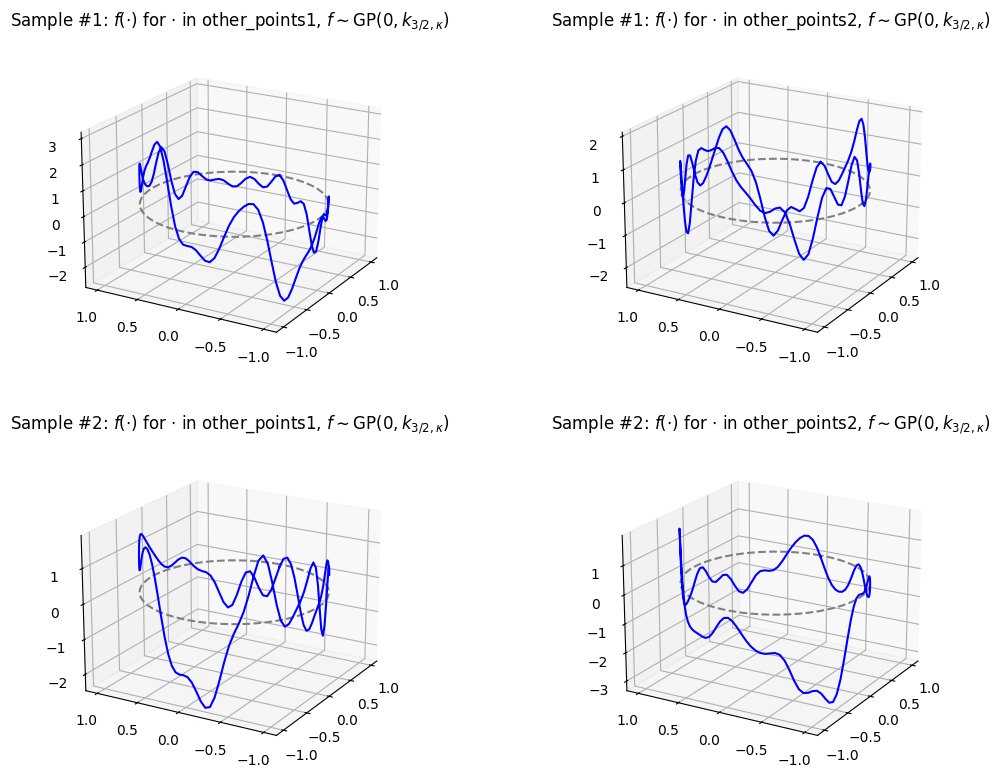

In [25]:
key, samples_other_points1 = sample_paths(other_points1, params_32)
key, samples_other_points2 = sample_paths(other_points2, params_32)

sample1_other_points1 = samples_other_points1[:, 0]
sample2_other_points1 = samples_other_points1[:, 1]
sample1_other_points2 = samples_other_points2[:, 0]
sample2_other_points2 = samples_other_points2[:, 1]

x_circle = np.cos(angles)
y_circle = np.sin(angles)
z_circle = np.zeros_like(angles) # z=0 for the circle

def plot_sample(ax, values, title):
    # Draw the unit circle
    ax.plot(x_circle, y_circle, z_circle, linestyle='dashed', color='gray')
    # Plot the new function evaluated only on the unit circle
    ax.plot(x_circle, y_circle, values, color='b')
    # Set the viewing angle for better visualization
    ax.view_init(elev=20., azim=180+30)
    ax.set_title(title)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(figsize=(12.8, 9.6), nrows=2, ncols=2,
                               subplot_kw=dict(projection='3d',
                                               computed_zorder=False))

plot_sample(ax1, samples_other_points1[:, 0], 'Sample #1: $f(\cdot)$ for $\cdot$ in other_points1, $f \sim \mathrm{GP}(0, k_{3/2, \kappa})$')
plot_sample(ax2, samples_other_points2[:, 0], 'Sample #1: $f(\cdot)$ for $\cdot$ in other_points2, $f \sim \mathrm{GP}(0, k_{3/2, \kappa})$')
plot_sample(ax3, samples_other_points1[:, 1], 'Sample #2: $f(\cdot)$ for $\cdot$ in other_points1, $f \sim \mathrm{GP}(0, k_{3/2, \kappa})$')
plot_sample(ax4, samples_other_points2[:, 1], 'Sample #2: $f(\cdot)$ for $\cdot$ in other_points2, $f \sim \mathrm{GP}(0, k_{3/2, \kappa})$')


# Display the plot
plt.show()

# Citation

If you are using (hyper)spheres and GeometricKernels, please consider citing

```
@article{borovitskiy2020,
    title={Matern Gaussian processes on Riemannian manifolds},
    author={Viacheslav Borovitskiy and Alexander Terenin and Peter Mostowsky and Marc Peter Deisenroth},
    booktitle={Advances in Neural Information Processing Systems},
    year={2020}}
```